In [13]:
import spotipy

from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd

import seaborn as sb

import scipy.stats as st

import numpy as np

In [14]:
cid = '6fb9d779d50544b885ff9dcf349fb434'
secret = '2c1249d673de470d96baa2ca2c2d522e'

client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

In [15]:
def call_playlist(creator, playlist_id):
    
    #step1

    playlist_features_list = ["artist","album","track_name",  "track_id","danceability","energy","key","loudness","mode", "speechiness","instrumentalness","liveness","valence","tempo", "duration_ms","time_signature"]
    
    playlist_df = pd.DataFrame(columns = playlist_features_list)
    
    #step2
    
    playlist = sp.user_playlist_tracks(creator, playlist_id)["items"]
    for track in playlist:
        # Create empty dict
        playlist_features = {}
        # Get metadata
        playlist_features["artist"] = track["track"]["album"]["artists"][0]["name"]
        playlist_features["album"] = track["track"]["album"]["name"]
        playlist_features["track_name"] = track["track"]["name"]
        playlist_features["track_id"] = track["track"]["id"]
        
        # Get audio features
        audio_features = sp.audio_features(playlist_features["track_id"])[0]
        for feature in playlist_features_list[4:]:
            playlist_features[feature] = audio_features[feature]
        
        # Concat the dfs
        track_df = pd.DataFrame(playlist_features, index = [0])
        playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)

    #Step 3
        
    return playlist_df

In [16]:
playlist_df = call_playlist("spotify","0yKP57q0HSSZJf17jiwFbX")
playlist_df

C:\Users\jaily\AppData\Local\Temp\ipykernel_20016\1282024064.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  playlist_df = pd.concat([playlist_df, track_df], ignore_index = True)


,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Lady A,Need You Now,Need You Now,11EX5yhxr9Ihl3IN1asrfK,0.587,0.622,4,-5.535,1,0.0303,0.000636,0.2000,0.231,107.943,277573,4
1,Adele,21,Rolling in the Deep,1c8gk2PeTE04A1pIDH9YMk,0.730,0.769,8,-5.114,1,0.0298,0.000000,0.0473,0.507,104.948,228093,4
2,Adele,25,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.430,5,-6.134,0,0.0305,0.000000,0.0854,0.288,78.991,295502,4
3,Gotye,Making Mirrors,Somebody That I Used To Know,4wCmqSrbyCgxEXROQE6vtV,0.864,0.495,0,-7.036,1,0.0370,0.000133,0.0992,0.720,129.062,244973,4
4,Daft Punk,Get Lucky (Radio Edit) [feat. Pharrell William...,Get Lucky (Radio Edit) [feat. Pharrell William...,2Foc5Q5nqNiosCNqttzHof,0.794,0.811,6,-8.966,0,0.0380,0.000001,0.1010,0.862,116.047,248413,4
5,Sam Smith,In The Lonely Hour,Stay With Me,5Nm9ERjJZ5oyfXZTECKmRt,0.418,0.420,0,-6.444,1,0.0414,0.000064,0.1100,0.184,84.094,172724,4
6,Mark Ronson,Uptown Special,Uptown Funk (feat. Bruno Mars),32OlwWuMpZ6b0aN2RZOeMS,0.856,0.609,0,-7.223,1,0.0824,0.000082,0.0344,0.928,114.988,269667,4
7,Bruno Mars,24K Magic,24K Magic,6b8Be6ljOzmkOmFslEb23P,0.818,0.803,1,-4.282,1,0.0797,0.000000,0.1530,0.632,106.970,225983,4
8,Childish Gambino,This Is America,This Is America,0b9oOr2ZgvyQu88wzixux9,0.854,0.463,5,-6.159,1,0.1370,0.000000,0.3540,0.549,120.024,225773,4
9,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",bad guy,2Fxmhks0bxGSBdJ92vM42m,0.701,0.425,7,-10.965,1,0.3750,0.130000,0.1000,0.562,135.128,194088,4


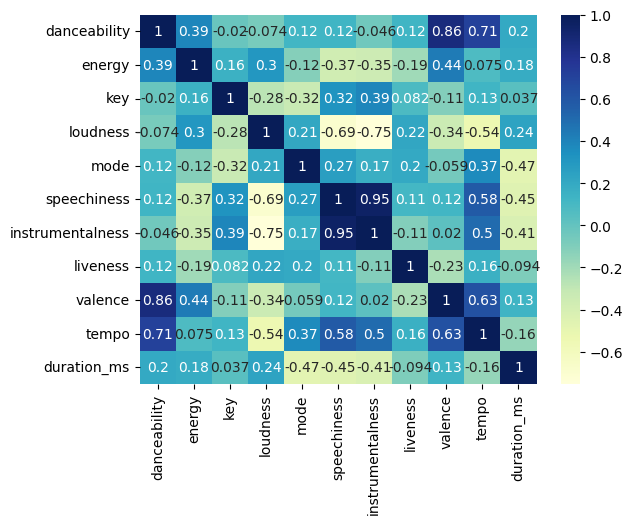

In [21]:
playlist2 = playlist_df.drop(columns = ["artist", "album", "track_id", "track_name", "time_signature"])
#print(playlist2.corr())
dataplot = sb.heatmap(playlist2.corr(), cmap="YlGnBu", annot=True)
# savefig("correlationmatrix.png")
#mp.show()

In [22]:
# instrumentalness and speechiness, valence and danceability, tempo and danceability, valence and tempo
# All of these have a high correlation meaning they have a positive relationship i.e. songs with higher 'instrumentalness' tend to have more 'speechiness'

<Axes: xlabel='valence', ylabel='danceability'>

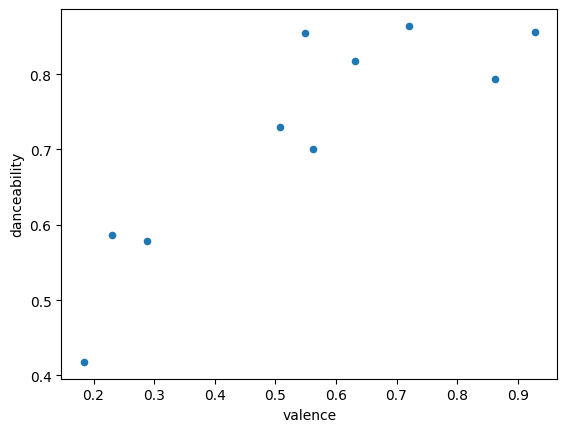

In [23]:
playlist2.plot.scatter(x = "valence", y = 'danceability')

<Axes: xlabel='tempo', ylabel='valence'>

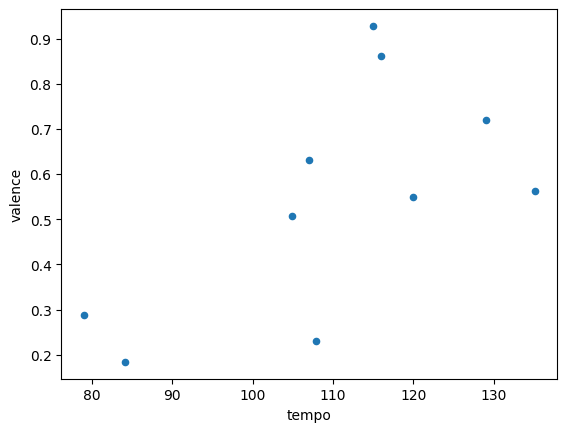

In [24]:
playlist2.plot.scatter(x = "tempo", y = 'valence')